线性回归案例
--
在学习线性回归以及今后的逻辑回归和神经网络必然用到库numpy，在numpy中存在array和matrix两种数据结构。

1. 当为array的时候，默认d*f就是对应元素的乘积，multiply也是对应元素的乘积，dot（d,f）会转化为矩阵的乘积， dot点乘意味着相加，而multiply只是对应元素相乘，不相加。

2. 当为mat的时候，默认d*f就是矩阵的乘积，multiply转化为对应元素的乘积，dot（d,f）为矩阵的乘积


# 一、单变量的线性回归


在本案例中，样本数据集每行为一个对象。对象属性只有一个x，对象预测值也只有一个y。

**1、加载数据集**

先构造一个简单的一维数据集，x和y近乎服从线性分布。第一列为第一个特征属性，即x数据，第二列为输出结果，即y数据（要预测的值）


```
0.067732	3.176513
0.427810	3.816464
0.995731	4.550095
0.738336	4.256571
0.981083	4.560815
0.526171	3.929515
0.378887	3.526170
0.033859	3.156393
0.132791	3.110301
0.138306	3.149813
0.247809	3.476346
0.648270	4.119688
0.731209	4.282233
0.236833	3.486582
0.969788	4.655492
0.607492	3.965162
0.358622	3.514900
0.147846	3.125947
0.637820	4.094115
0.230372	3.476039
0.070237	3.210610
0.067154	3.190612
0.925577	4.631504
0.717733	4.295890
0.015371	3.085028
0.335070	3.448080
0.040486	3.167440
0.212575	3.364266
0.617218	3.993482
0.541196	3.891471
```

我们知道使用y=xw进行计算时，其实是将偏量b算入了w中，为x添加了一个属性，值为1。

因此在下面的数据集加载函数loadDataSet中，我们为样本数据第一列添加了一个值为1的属性。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#加载数据集，最后一列最为目标值，前面的为特征属性的值
def loadDataSet(fileName):
    xArr = []; yArr = []
    for line in open(fileName).readlines():
        curLine = line.strip().split('\t')
        xonerow = [1.0]   #添加1.0作为第一个系数，则第一个系数的权重用来代表y=wx+b中的b变量
        for i in range(len(curLine)-1):
            xonerow.append(float(curLine[i]))  #最后一列为输出结果值y，前面的值为输入x值
        xArr.append(xonerow)
        yArr.append(float(curLine[-1]))  #添加最后一列为结果值

    return xArr, yArr

使用可视化查看一下x-y的分布。

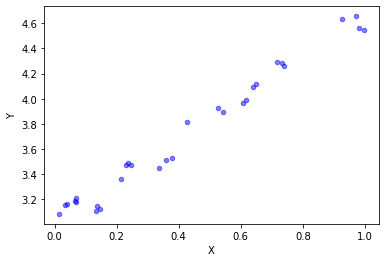

In [3]:
#绘制二维数据集
def plotDataSet():
    xArr, yArr = loadDataSet('data.txt')                                #加载数据集
    xcord = [xArr[i][1] for i in range(len(xArr))]
    ycord = [yArr[i] for i in range(len(yArr))]                         #样本点
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord, ycord, s = 20, c = 'blue',alpha = .5)                #绘制样本点
    plt.xlabel('X');plt.ylabel('Y')
    plt.show()

if __name__ == '__main__':
    plotDataSet()

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/aad748b9995915c93c04f6cc8eb31c4b.png)

**2、获取线性回归模型**

**最小二乘方法**

我们知道使用下面的公式直接计算权重矩阵。

$w=(X^TX)^{-1}X^Ty$

代码实现如下。

standRegres函数根据输入输出，计算回归系数w。

In [4]:
#最小二乘法计算回归系数。xArr为样本数据集，包含m个对象，n种属性。yarr为结果数据集
def standRegres(xArr,yArr):
    xMat = np.mat(xArr)       #转化为x矩阵。自动形成m行n列
    yMat = np.mat(yArr).reshape(len(yArr),1)     #转化为y列向量
    xTx = xMat.T * xMat       #根据文中推导的公示计算回归系数
    if np.linalg.det(xTx) == 0.0:   #对不能求逆的结果返回
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T*yMat)  #最小二乘求导出为0时的权重向量
    return ws

我们来调用一下这个函数，来试试求解w。

plotRegression函数先求解了回归系数w，然后绘制样本数据集点，又绘制了w系数（所谓绘制w就是绘制w所代表的直线）

[[3.02863046]
 [1.6314263 ]]


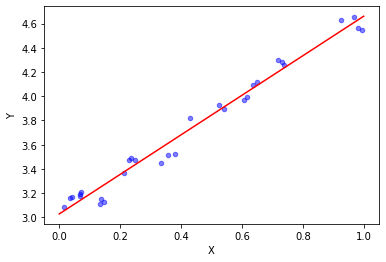

In [5]:
# 绘制样本数据集，求解回归曲线，绘制回归曲线。regression为计算回归系数的函数
def plotRegression(regression):
    # 计算回归系数
    xArr, yArr = loadDataSet('data.txt')                                    #加载数据集
    ws = regression(xArr, yArr)                                           #计算回归系数列向量
    print(ws)

    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵（行向量）

    # 绘制样本数据集
    xarr = xMat[:, 1].flatten().A[0]  # 将矩阵第一列转化为一行矩阵，并获取第一行的列表
    yarr = yMat.flatten().A[0]  # 将矩阵第一列转化为一行矩阵，并获取第一行的行向量
    plt.scatter(xarr, yarr, s=20, c='blue', alpha=.5)  # 绘制样本点

    # 绘制回归系数。通过两个待测点，预测其值。以直线的形式反映出回归系数。
    testArr = np.array([[1,0],[1,1]])                                        #将对象[1,0]和对象[1,1]最为待测对象，第一个1为常值代表偏量，后面的分量代表属性x的值
    yHat = np.dot(testArr,ws)                                                      #计算使用线性模型预测的y值。dot就是矩阵乘法。
    plt.plot(testArr[:,1], yHat, c = 'red')                                #绘制回归曲线，x为第1列，y为结果列向量，
    plt.xlabel('X');plt.ylabel('Y')
    plt.show()

if __name__ == '__main__':
    plotRegression(standRegres)

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/faeaa1934abb28737a3e0af235ada6b6.png)

输出结果为
[[ 3.02863046]

 [ 1.6314263 ]]

即线性模型为**y=3.02+1.63*x**

图中的直线就是w的图形表示。也就是y=3.02+1.63*x这条直线。

**梯度下降法**

根据上面的公式w的梯度为

$\nabla J(w)=2X^T(Xw-y)$

梯度下降法的更新公式为

$w_{k+1}=w_k-\rho\nabla J(w_k)$

用python实现上面的公式

In [6]:
#梯度下降法计算回归系数。xArr为属性数据集，每行为一个对象。yArr为结果数据集，每行为一个对象的结果。
def gradAscent(xArr,yArr):
    xMatrix = np.mat(xArr)                                        #转换成numpy的矩阵。xMatrix每行为一个对象，每列为一种特征属性
    yMatrix = np.mat(yArr).reshape(len(yArr),1)            #转换成numpy的矩阵,并变维成列向量
    m, n = np.shape(xMatrix)                                            #返回dataMatrix的大小。m为样本对象的个数,n为列数。
    alpha = 0.001                                                        #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500                                                      #最大迭代次数
    weights = np.ones((n,1))                                             #初始化权重列向量
    for k in range(maxCycles):
        h =  xMatrix * weights                               #梯度上升矢量化公式，计算预测值（列向量）
        error = h - yMatrix                                            #计算误差
        weights = weights - alpha * 2 * xMatrix.T * error                 # 调整回归系数
    return weights.getA()                                                #将矩阵转换为数组，返回权重数组

我们来调用一下上面的梯度下降法，试试求解回归系数w。

仍然使用上面的plotRegression函数

[[3.01830318]
 [1.65370732]]


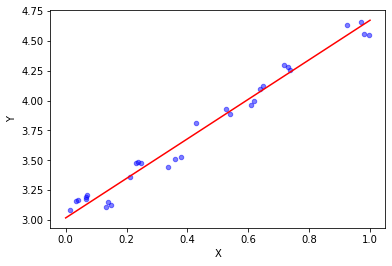

In [7]:
if __name__ == '__main__':
    plotRegression(gradAscent)

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/37c0a60d2a8c9518a48e30fde89bcb96.png)

输出结果为
[[ 3.01830318]

 [ 1.65370732]]
 
即线性模型为**y=3.02+1.65*x**

结果与使用最小二乘法获得的线性模型基本一致。

**随机梯度下降法求解回归系数**

根据前面理论部分的推导我们知道随机梯度下降法

$w_{k+1}=w_k-2*\rho_kx_k^T(x_kw_k-y_k)$

（其中$x_k$为第k个样本对象，为行向量。$y_k$为该对象产生的预测输出数值。$w_k$为迭代第k次产生的权重列向量w，当对新的一行对象进行预测时，总是使用最新的w。）

其中学习速率$\rho_k$要满足，具体取什么值呢，其实并没有规定。

$\displaystyle\sum_{k=1}^{\infty} \rho_k \to\infty$

$\displaystyle\sum_{k=1}^{\infty} \rho_k^2 < \infty$

学习速率大，会不收敛，学习速率小会收敛慢，所以这是个尝试的过程。

在随机梯度中，我们使用如下的形式。i为第几次迭代，k为迭代到第几行数据了。

$ \rho_k =\frac{4}{(1.0 + i + k)}  + 0.01$

实现代码

In [8]:
#随机梯度下降法计算回归系数
def randgradAscent(xArr,yArr):
    xMatrix = np.mat(xArr)                                        #转换成numpy的矩阵。xMatrix每行为一个对象，每列为一种特征属性
    yMatrix = np.mat(yArr).reshape(len(yArr),1)                   #转换成numpy的矩阵,并变维成列向量
    m, n = np.shape(xMatrix)                                            #返回dataMatrix的大小。m为样本对象的个数,n为列数。
    maxCycles = 100                                                      #最大迭代次数
    weights = np.ones((n,1))                                             #初始化权重列向量
    for i in range(maxCycles):
        for k in range(m):
            alpha = 4 / (1.0 + i + k) + 0.01                       # 降低alpha的大小，每次减小1/(j+i)。刚开始的时候可以步长大一点，后面调整越精细
            h =  xMatrix[k] * weights                                      #随机梯度上升矢量化公式，计算预测值y
            error = h - yMatrix[k]                                            #计算误差
            weights = weights - 2*alpha * xMatrix[k].T * error                 # 调整回归系数
    return weights.getA()          

同样进行计算绘制

[[3.03501804]
 [1.62654039]]


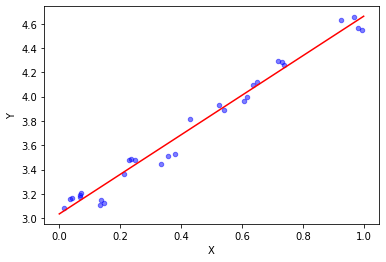

In [9]:
if __name__ == '__main__':
    plotRegression(randgradAscent)

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/3fd54226f412637fec822e20b6ba326c.png)

得到的结果为

[[ 3.03501804]

 [ 1.62654039]]

即线性模型为**y=3.03+1.62*x**

结果与使用最小二乘法获得的线性模型基本一致。

----------



# 拟合：拟合模型/函数


在学习后面的内容前，我们先来了解一下拟合问题。

一个模型在训练数据上能够获得比其他模型更好的拟合， 但是在训练数据外的数据集上却不能很好地拟合数据，此时认为这个模型出现了过拟合的现象。

出现这种现象的主要原因是训练数据中存在噪音或者训练数据太少。

例如下图

![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/e1354c9412c537c21203ffe00141dd7f.png)


可以看出当样本数较少时，如图中a，我们建立的分类模型会如a中所示，虽然完全的拟合了样本数据，但是当数据集增大时，如b图中所示，测试数据分类准确度很差。

这就是过拟合现象。

正确的建模应该如c中所示，虽然没有完全拟合样本数据，但在对于测试数据的分类准确度却很高，如图d。

过拟合问题往往是由于训练数据少、样本噪声等原因造成的。


根据样本数据，建立模型。根据拟合的模型是否合适？可分为以下三类：

1、合适拟合

2、欠拟合，或者叫作叫做高偏差(bias)。

3、过拟合，也叫高方差(variance)。


再用几个简单的图形象了解一下过拟合和欠拟合。



![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/527c639567865236ebcf0ba8d1dcf2eb.png)


![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/0b1201e8d785ebd8dd84c27c2f2d324c.png)


在线性回归中就可能会出现过拟合和欠拟合的问题。下面我们就来解决这两种问题。


# 正则化（处理过拟合）：


过拟合的问题如何解决？

问题起源：模型太复杂，参数过多，特征数目过多。


方法： 

1） 减少特征的数量，有人工选择，或者采用模型选择算法
http://www.cnblogs.com/heaad/archive/2011/01/02/1924088.html （特征选择算法的综述）

2） 正则化，即保留所有特征，但降低参数的值的影响。正则化的优点是，特征很多时，每个特征都会有一个合适的影响因子。

拟合问题的状况，在线性回归问题中就是损失函数的量值不同。

正则化就是为防止过度拟合的模型出现（过于复杂的模型），在损失函数里增加一个每个特征的惩罚因子。

如正则化的线性回归的损失函数：

$$J(w)=\frac{1}{2m}[\sum_{i=1}^m(h_w(x^{(i)})-y^{(i)})^2]+\lambda\sum_{j=1}^n w^2_j$$

$\lambda$就是惩罚因子。

正则化是模型处理的典型方法。也是结构风险最小的策略。在经验风险（误差平方和）的基础上，增加一个惩罚项/正则化项。

则最小二乘线性回归的解，也转化为

$$w = (X^TX+\lambda
		\begin{pmatrix}
        0 \\
          &1&\\
          &  &1 & \\
        &&& \cdots\\
         && &  &1 \\
        \end{pmatrix}
        )^{-1}X^Ty$$

括号内的矩阵，即使在样本数小于特征数的情况下，也是可逆的。

逻辑回归的正则化：

$$J(w)=-[\frac{1}{m} \sum_{i=1}^my^{(i)}log h_w(x^{(i)})+(1-y^{(i)})log(1-h_w(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^nw_j^2$$

从贝叶斯估计来看，正则化项对应模型的先验概率，复杂模型有较大先验概率，简单模型具有较小先验概率。这个里面又有几个概念。

**L1正则化、L2正则化**

L1正则化和L2正则化可以看做是损失函数的惩罚项。对于线性回归模型，使用L1正则化的模型建叫做Lasso回归，使用L2正则化的模型叫做Ridge回归（岭回归）。

L1正则化是指权值向量w中各个元素的绝对值之和，通常表示为$||w||_1$

$$J(w)=\frac{1}{2m}[\sum_{i=1}^m(h_w(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n |w_j|]$$

L2正则化是指权值向量w中各个元素的平方和然后再求平方根（可以看到Ridge回归的L2正则化项有平方符号），通常表示为$||w||_2$

$$J(w)=\frac{1}{2m}[\sum_{i=1}^m(h_w(x^{(i)})-y^{(i)})^2]+\lambda\sum_{j=1}^n w^2_j$$


L1正则化可以产生稀疏权值矩阵，即产生一个稀疏模型，可以用于特征选择。

这是因为w绝对值求和这个正则项求导产生的后果是：当w为正时，更新后的w变小。

当w为负时，更新后的w变大。因此它的效果就是让w往0靠，使网络中的权重尽可能为0，也就相当于减小了网络复杂度，防止过拟合。

但是由于lasso回归的损失函数是不可导的，所以梯度下降算法将不再有效，下面利用坐标轴下降法进行求解。

坐标轴下降法和梯度下降法具有同样的思想，都是沿着某个方向不断迭代，但是梯度下降法是沿着当前点的负梯度方向进行参数更新，而坐标轴下降法是沿着坐标轴的方向。

**L2正则化可以防止模型过拟合（overfitting）；一定程度上，L1也可以防止过拟合**

L2 和 L1 采用不同的方式降低权重：

 - L2 会降低权重2。
 - L1 会降低 |权重|。

因此，L2 和 L1 具有不同的导数：

 - L2 的导数为 2 * 权重。
 - L1 的导数为 k（一个常数，其值与权重无关）。


可以将 L2 的导数的作用理解为每次移除权重的 x%。

如 Zeno 所知，对于任意数字，即使按每次减去 x% 的幅度执行数十亿次减法计算，最后得出的值也绝不会正好为 0。

（Zeno 不太熟悉浮点精度限制，它可能会使结果正好为 0。）

总而言之，L2 通常不会使权重变为 0。


可以将 L1 的导数的作用理解为每次从权重中减去一个常数。

不过，由于减去的是绝对值，L1 在 0 处具有不连续性，这会导致与 0 相交的减法结果变为 0。

例如，如果减法使权重从 +0.1 变为 -0.2，L1 便会将权重设为 0。就这样，L1 使权重变为 0 了。

**L1 正则化 - 减少所有权重的绝对值 - 证明对宽度模型非常有效。**

总结就是：L1会趋向于产生少量的特征，而其他的特征都是0，而L2会选择更多的特征，这些特征都会接近于0。

Lasso在特征选择时候非常有用，而Ridge就只是一种规则化而已。


# 坐标轴下降法（解决L1正则化不可导的问题）


设lasso回归的损失函数为：

$$J(w)=\frac{1}{2m}[\sum_{i=1}^m(h_w(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n |w_j|]$$

其中，m为样本个数，n为特征个数。

由于lasso回归的损失函数是不可导的，所以梯度下降算法将不再有效，下面利用坐标轴下降法进行求解。

坐标轴下降法和梯度下降法具有同样的思想，都是沿着某个方向不断迭代，但是梯度下降法是沿着当前点的负梯度方向进行参数更新，

而坐标轴下降法是沿着坐标轴的方向。

梯度下降法：优化目标在w的n个坐标轴上(或者说向量的方向上)对损失函数做迭代的下降，当所有的坐标轴上的$w_i$(i = 1,2,...n)都达到收敛时，我们的损失函数最小，此时的w即为我们要求的结果。

坐标轴下降法进行参数更新时，每次总是固定另外n-1个值，求另外一个的局部最优值，这样也避免了Lasso回归的损失函数不可导的问题。

坐标轴下降法每轮迭代都需要O(mn)的计算。（和梯度下降算法相同）

坐标轴下降法的数学依据为：对于一个可微凸函数，其中为的向量，如果对于一个解，使得在某个坐标轴上都能达到最小值，则就是的全局的最小值点。

# 局部加权线性回归（处理欠拟合）


线性回归的另一个问题是有可能出现欠拟合现象，因为它求的是具有小均方误差的无偏估计。

显而易见，如果模型欠拟合将不能取得好的预测效果。所以有些方法允许在估计中引入一些偏差，从而降低预测的均方误差。

其中的一个方法是局部加权线性回归（LWLR）。在该方法中，我们给待预测点附近的每个点赋予一定的权重。与KNN一样，这种算法每次预测均需要事先计算样本对象与待测对象的距离，并根据距离为样本对象中的对象赋予权值。

注意：这个算法中涉及两个W矩阵，一个是根据待测对象为每个样本对象设置的权值矩阵W。

它是一个对角矩阵，维度和样本数据集的对象个数相等。每个对角上的值，表示每个样本对象的权值。另外一个矩阵W就是我们要求得的回归系数矩阵W。

该算法解出回归系数W的形式如下：公式中的大写W为权重矩阵，小写w为回归系数。

$$w=(X^TWX)^{-1}X^TWy$$

这个公式跟我们上面推导的公式的区别就在于权重矩阵W，它用来给每个点赋予权重。不同的待测对象的权重矩阵是不同的。

LWLR使用”核”（与支持向量机中的核类似）来对附近的点赋予更高的权重。

核的类型可以自由选择，最常用的核就是高斯核，高斯核对应的权重如下：其中$W(i,i)$表示权重矩阵第i个对角值，$x_i$表示第i个样本对象，$x$表示待测对象。

$$W(i,i)=exp(-\frac{(x_i-x)^2}{2k^2})$$

我们通过改变k的值，可以调节回归效果。

实现代码


矩阵为奇异矩阵,不能求逆
矩阵为奇异矩阵,不能求逆


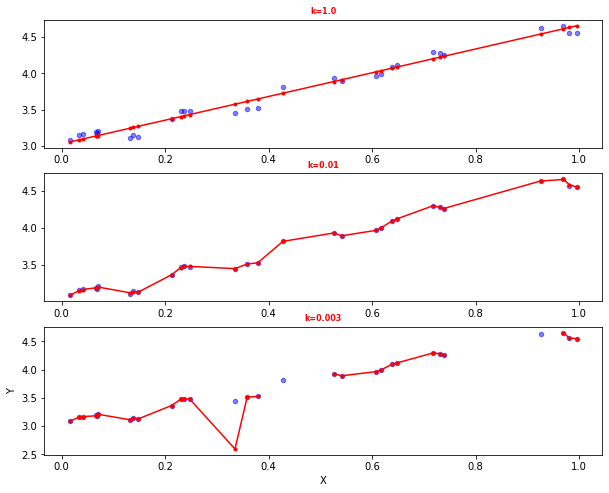

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#加载数据集，最后一列最为目标值，前面的为特征属性的值
def loadDataSet(fileName):
    xArr = []; yArr = []
    for line in open(fileName).readlines():
        curLine = line.strip().split('\t')
        xonerow = [1.0]   #添加1.0作为第一个系数，则第一个系数的权重用来代表y=wx+b中的b变量
        for i in range(len(curLine)-1):
            xonerow.append(float(curLine[i]))  #最后一列为输出结果值y，前面的值为输入x值
        xArr.append(xonerow)
        yArr.append(float(curLine[-1]))  #添加最后一列为结果值

    return xArr, yArr


# 局部加权线性回归。绘制多条局部加权回归曲线
def plotlwlrRegression():
    xArr, yArr = loadDataSet('data.txt')                                    #加载数据集
    xMat = np.mat(xArr)                                                    #创建xMat矩阵。属性数据集，每行为一个样本对象，每列为一种属性
    yMat = np.mat(yArr).reshape(len(yArr),1)                               #创建yMat矩阵。将结果值存储成列向量

    testMat = xMat                     #原样选取样本数据集作为测试集。看看预测结果与真实结果之间的差距
    m = np.shape(testMat)[0]          # 计算待测数据集的样本个数
    yHat_1 = []  # 定义一个列表用来存储预测值
    yHat_2 = []  # 定义一个列表用来存储预测值
    yHat_3 = []  # 定义一个列表用来存储预测值
    for i in range(m):  # 对每个待测样本点进行预测
        yHat_1.append(lwlr(testMat[i,:], xMat, yMat, 1.0))                    # 根据局部加权线性回归计算yHat
        yHat_2.append(lwlr(testMat[i,:], xMat, yMat, 0.01))                   # 根据局部加权线性回归计算yHat
        yHat_3.append(lwlr(testMat[i,:], xMat, yMat, 0.003))                   # 根据局部加权线性回归计算yHat
    yHat_1 = np.mat(yHat_1).reshape(len(yHat_1),1)
    yHat_2 = np.mat(yHat_2).reshape(len(yHat_2), 1)
    yHat_3 = np.mat(yHat_3).reshape(len(yHat_3), 1)


    srtInd = xMat[:, 1].argsort(0)                                              #将样本数据集，第2列排序，返回索引值
    xSort = xMat[srtInd][:,0,:]                                                 #根据排序索引，将所有列排序
    ySort_1 = yHat_1[srtInd][:,0,:]
    ySort_2 = yHat_2[srtInd][:,0,:]
    ySort_3 = yHat_3[srtInd][:,0,:]

    fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(10,8))                    #创建三个子图
    axs[0].plot(xSort[:,1], ySort_1, c = 'red',marker='.')                        #绘制回归曲线
    axs[1].plot(xSort[:,1], ySort_2, c = 'red',marker='.')                        #绘制回归曲线
    axs[2].plot(xSort[:,1], ySort_3, c = 'red',marker='.')                        #绘制回归曲线

    axs[0].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[1].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[2].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点

    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title(u'k=1.0', size=8, weight='bold', color='red')
    axs1_title_text = axs[1].set_title(u'k=0.01', size=8, weight='bold', color='red')
    axs2_title_text = axs[2].set_title(u'k=0.003', size=8, weight='bold', color='red')


    plt.xlabel('X');plt.ylabel('Y')
    plt.show()


# 使用局部加权线性回归计算回归系数w。不同的待测点获得的回归系数都不同。testPoint待测对象，xArr样本数据集，yArr结果数据集，k - 高斯核的k，表示拟合程度，为0表示100%拟合,自定义参数
def lwlr(testPoint, xMat, yMat, k = 1.0):
    m = np.shape(xMat)[0]                                               # 获取样本数量
    weights = np.mat(np.eye((m)))                                       # 初始化局部权重对角矩阵。这里的局部权重矩阵是为待测点周边的每个节点赋予的影响矩阵。并不是线性回归系数。
    for j in range(m):                                                 # 遍历数据集计算每个样本的权重
        diffMat = testPoint - xMat[j,:]                                # 计算样本中每个对象与待测对象之间的距离
        weights[j, j] = np.exp(diffMat * diffMat.T/(-2.0 * k**2))       # 为每个周边节点设定权重。越近的节点权重越大，越远的节点权重越小
    xTx = xMat.T * (weights * xMat)                                     #  增加了局部权重矩阵，增大临近节点的影响力，降低远方节点的影响力
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))                            # 计算回归系数
    y = testPoint * ws                                                  # 计算预测值，矩阵相乘得到的是矩阵。虽然只有一个元素
    return y[0,0]       #读取矩阵的值，返回数值


if __name__ == '__main__':
    plotlwlrRegression()


![这里写图片描述](https://img-blog.csdnimg.cn/img_convert/39431a55e6f6a752b854298c6023316f.png)


结果分析：很明显，当k=1.0时，回归曲线与散点图欠拟合(underfitting)，此时权重很大，如同将所有数据视为等权重，相当于普通线性回归模型；

当k=0.01时得到了很好的效果；当k=0.003时，回归曲线与散点图过拟合(overfitting)，由于纳入了太多的噪声点，拟合的直线与数据点过于贴近，此时也不属于理想的模型。